In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [12]:
def create_alexnet(input_shape, num_classes):
    model = models.Sequential([
        layers.Reshape((28,28,1), input_shape=input_shape),
        # Primeira Camada convolucional
        layers.Conv2D(32,(3,3),strides=(1,1),activation='relu'),
        layers.MaxPooling2D((2,2),strides=(2,2)),
        # Segunda Camada Convolucional
        layers.Conv2D(64,(3,3),activation='relu',padding='same'),
        layers.MaxPooling2D((2,2),strides=(2,2)),
        # Terceira Camada Convolucional
        layers.Conv2D(128,(3,3),activation='relu',padding='same'),
        # Quarta Camada Convolucional
        layers.Conv2D(128,(3,3),activation='relu',padding='same'),
        # Quinta Camada Convolucional
        layers.Conv2D(128,(3,3),activation='relu',padding='same'),
        # Flatten para transformar em vetor
        layers.Flatten(),
        # Primeira Camada Densa
        layers.Dense(512,activation='relu'),
        layers.Dropout(0.5),
        # Segunda Camada Densa
        layers.Dense(256,activation='relu'),
        layers.Dropout(0.5),
        # Camada de Saída
        layers.Dense(10,activation='softmax')
    ])
    return model

In [13]:
# Carregando MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
# Normalizando valores
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
# Convertendo para onehotencoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [19]:
input_shape = x_train.shape[1:]
num_classes = 10

In [20]:
model = create_alexnet(input_shape, num_classes)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test,y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n\n\nAcuracia: {test_accuracy:.6f}")

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 256s 270ms/step - accuracy: 0.8456 - loss: 0.4727 - val_accuracy: 0.9866 - val_loss: 0.0453
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 247s 263ms/step - accuracy: 0.9816 - loss: 0.0664 - val_accuracy: 0.9915 - val_loss: 0.0313
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 265s 267ms/step - accuracy: 0.9882 - loss: 0.0420 - val_accuracy: 0.9911 - val_loss: 0.0296
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9894 - loss: 0.0388



Acuracia: 0.99


In [25]:
x_test.shape

(10000, 28, 28, 1)

In [26]:
y_test.shape

(10000,)

In [32]:
# Carregar o dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#x_train = x_train / 255.0
#x_test = x_test / 255.0

input_shape = x_train.shape[1:]
num_classes = 10

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


model2 = create_alexnet(input_shape, num_classes)

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=6, batch_size=64, validation_split=0.1)
loss, accuracy = model2.evaluate(x_test, y_test)
print(f"Perda no teste: {loss:.4f}, Acurácia no teste: {accuracy:.4f}")


Epoch 1/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 220s 258ms/step - accuracy: 0.6972 - loss: 1.1008 - val_accuracy: 0.8692 - val_loss: 0.3590
Epoch 2/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 260s 255ms/step - accuracy: 0.8696 - loss: 0.3754 - val_accuracy: 0.8940 - val_loss: 0.3193
Epoch 3/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 215s 255ms/step - accuracy: 0.8888 - loss: 0.3151 - val_accuracy: 0.8862 - val_loss: 0.3197
Epoch 4/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 265s 258ms/step - accuracy: 0.8997 - loss: 0.2822 - val_accuracy: 0.8992 - val_loss: 0.2799
Epoch 5/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 261s 257ms/step - accuracy: 0.9051 - loss: 0.2623 - val_accuracy: 0.8903 - val_loss: 0.2937
Epoch 6/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 215s 255ms/step - accuracy: 0.9070 - loss: 0.2573 - val_accuracy: 0.8960 - val_loss: 0.2746
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8910 - loss: 0.2999
Perda no teste: 0.2964, Acurácia no teste: 0.8935


In [52]:
num_instancias = y_test.shape[0]
indices_para_testar = list(range(num_instancias))

instancias_teste = x_test[indices_para_testar]
rotulos_reais = y_test[indices_para_testar]

predictions = model2.predict(instancias_teste)

classes_previstas = np.argmax(predictions, axis=1)

nomes_das_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

erros = [0,0,0,0,0,0,0,0,0,0]

for i, indice in enumerate(indices_para_testar):
    indice_classe_real = np.argmax(rotulos_reais[i])
    indice_classe_prevista = classes_previstas[i]

    if indice_classe_real != indice_classe_prevista:
        erros[indice_classe_real] += 1



313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step


In [53]:
print("Nome da Classe: Erro")
for i in range(10):
    print(f"Classe {nomes_das_classes[i]}: {erros[i]}")

Nome da Classe: Erro
Classe T-shirt/top: 168
Classe Trouser: 35
Classe Pullover: 147
Classe Dress: 107
Classe Coat: 211
Classe Sandal: 30
Classe Shirt: 263
Classe Sneaker: 46
Classe Bag: 23
Classe Ankle boot: 35


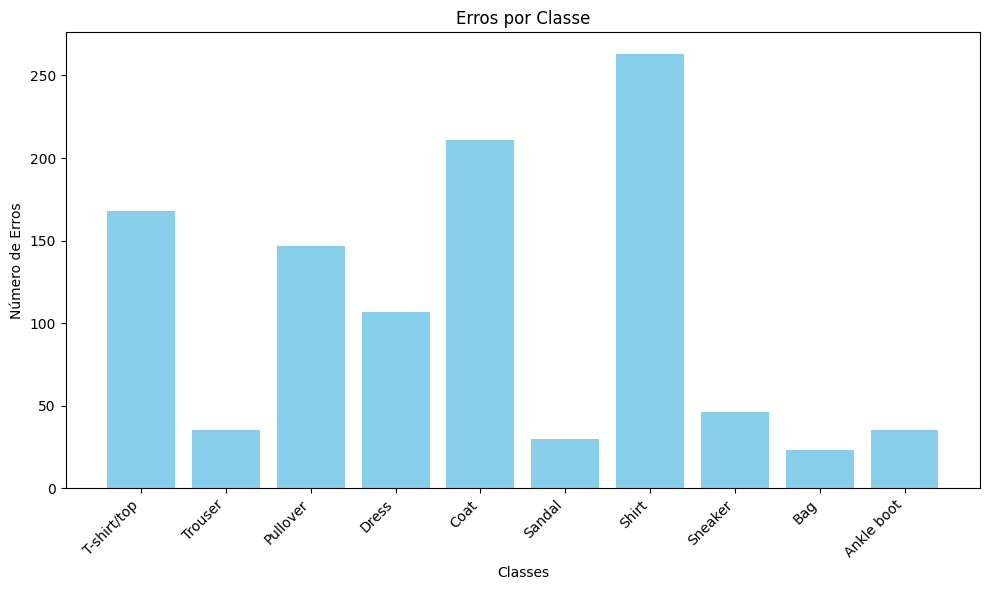

In [54]:
classes = nomes_das_classes
valores = erros

plt.figure(figsize=(10, 6))
plt.bar(classes, valores, color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Número de Erros")
plt.title("Erros por Classe")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

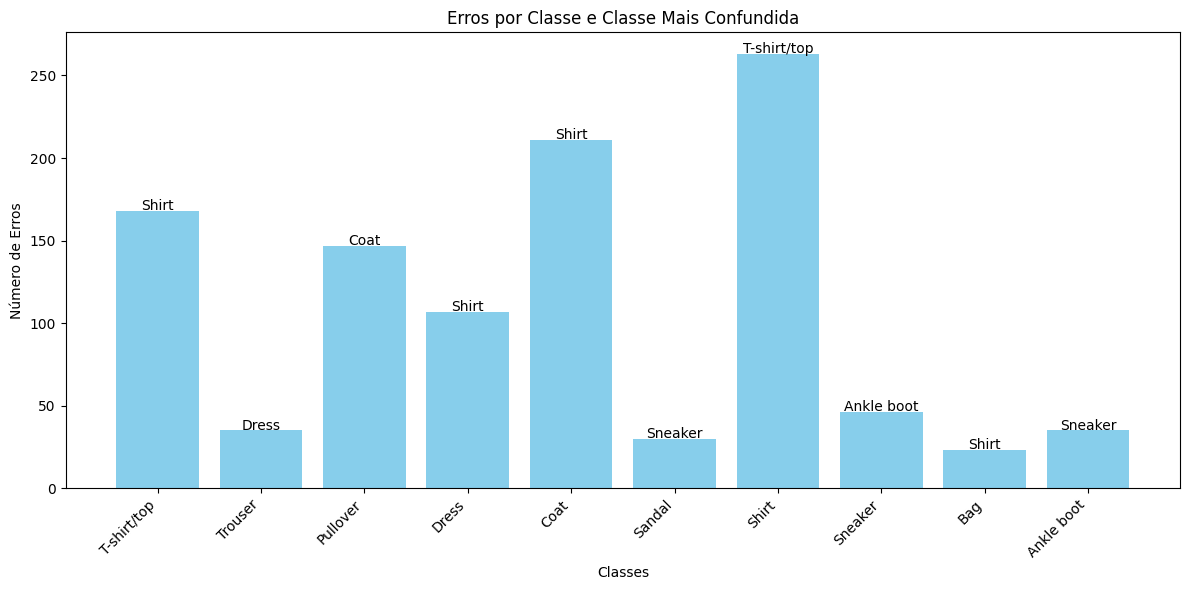

In [61]:
error_confusion = {}
for i in range(10):
    error_confusion[nomes_das_classes[i]] = {'erros': 0, 'classe_confusa': '', 'previsoes_incorretas': []}

for i, indice in enumerate(indices_para_testar):
    indice_classe_real = np.argmax(rotulos_reais[i])
    indice_classe_prevista = classes_previstas[i]

    if indice_classe_real != indice_classe_prevista:
        nome_classe_real = nomes_das_classes[indice_classe_real]
        nome_classe_prevista = nomes_das_classes[indice_classe_prevista]
        error_confusion[nome_classe_real]['erros'] += 1
        error_confusion[nome_classe_real]['previsoes_incorretas'].append(nome_classe_prevista)

for classe in error_confusion:
    previsoes_incorretas = error_confusion[classe]['previsoes_incorretas']
    if previsoes_incorretas:
        classe_mais_confusa = Counter(previsoes_incorretas).most_common(1)[0][0]
        error_confusion[classe]['classe_confusa'] = classe_mais_confusa

classes = list(error_confusion.keys())
valores = [d['erros'] for d in error_confusion.values()]

plt.figure(figsize=(12, 6))
plt.bar(classes, valores, color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Número de Erros")
plt.title("Erros por Classe e Classe Mais Confundida")
plt.xticks(rotation=45, ha='right')

for i, classe in enumerate(classes):
    classe_confusa = error_confusion[classe]['classe_confusa']
    if classe_confusa:
        plt.text(i, valores[i] + 0.5, classe_confusa, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [63]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

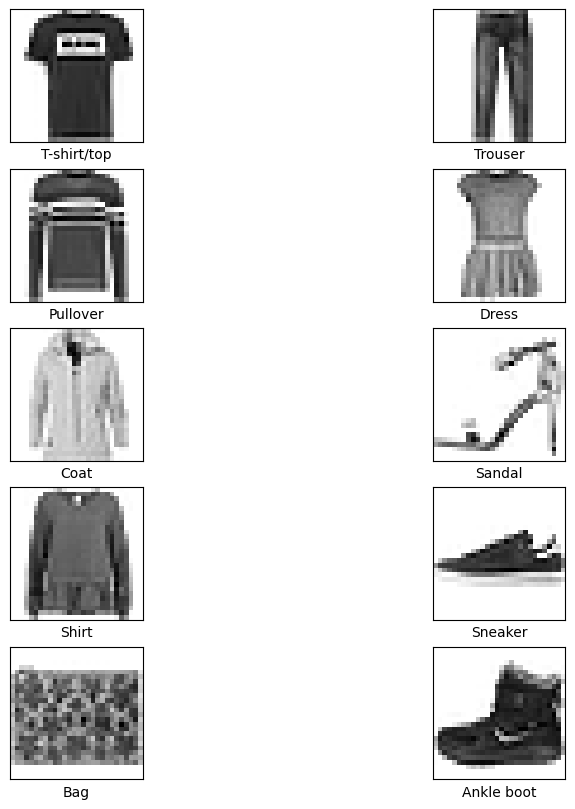

In [66]:
exemplos_por_classe = {}

for i in range(len(x_train)):
    rotulo = y_train[i]
    if rotulo not in exemplos_por_classe:
        exemplos_por_classe[rotulo] = x_train[i]
    if len(exemplos_por_classe) == len(nomes_das_classes):
        break

plt.figure(figsize=(10, 10))
for i in range(len(nomes_das_classes)):
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(exemplos_por_classe[i], cmap=plt.cm.binary)
    plt.xlabel(nomes_das_classes[i])
plt.show()